# **MILESTONE 1 PHASE 2**

# **INTRODUCING**

Name : Teza Marlevi Fajar

Batch : 11

Task :

On this occasion, I am doing a classification case modeling using tensorflow, I will make a model to predict whether a customer will unsubscribe or not.

--- 
Reminder!! Sorry if the results of the graph will be different from the explanation in the markdown, because the results of the model can change

Dataset :

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

- customerID: Unique ID of each customer
- gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharge: The amount charged to the customer monthly
- TotalCharges: The total amount charged to the customer



# **IMPORTING LIBRARY**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pickle
import cv2 as cv

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, concatenate 
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## Function

In this section I will create functions for some case handlers in model generation.

In [2]:
# Make Fucntion for check outliers

def diag_outlier_plots(data):
    for col in data :
        plt.figure(figsize=(16,5))

        #Histogram
        plt.subplot(1,2,1)
        sns.histplot(data[col], bins=30, linewidth=0.5)
        plt.title('Histogram')

        #boxplot
        plt.subplot(1,2,2)
        sns.boxplot(y=data[col], linewidth=0.5)
        plt.title('Boxplot')
        plt.show()

In [3]:
# Make Function for check distribution

def check_dist(data) :
    dist = data.skew(numeric_only=True)
    normal_dist = []
    skew_dist = []

    for i in range(len(dist)):
        if dist.values[i] < -0.5:
            skew_dist.append(dist.index[i])
        elif dist.values[i] > 0.5:
            skew_dist.append(dist.index[i])
        else:
            normal_dist.append(dist.index[i])

    print('skew_dist :', skew_dist)
    print("=========="*15)
    # normal_dist
    print('normal_dist :',normal_dist)

In [4]:
# Make Fucntion for check missing value

def detect_missval(df):
    global df_missval
    df_missval = pd.DataFrame(columns=['Columns Name','Missing Count','Missing Percentage'])
    for i in range(len(df.columns)):
        if df.iloc[:,i].isnull().sum() != 0:
            df_missval.loc[i] = [df.columns[i], 
                                df.iloc[:,i].isnull().sum(), 
                                df.iloc[:,i].isnull().sum()/len(df.iloc[:,i])*100]
    return df_missval

In [5]:
# Make Function for check Chisquare

def check_chisquare(data):
    print('========= P-Value =========')
    for i in data :
        if data[i].dtypes == 'O' :
            p = stats.chisquare(data[i].value_counts())[1]
            # df = {'Columns' : i, 'P-Value' : p}
            # df_chisquare = pd.DataFrame(data=df)
            print(i,':', p)
    print('========= P-Value =========')       
    # return df_chisquare 

# **DATA LOADING**

In [6]:
data  = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display Data
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Duplicate dataset

In [7]:
data_new = data.copy()

After duplicat dataset, we will setting Display Max Columns

In [8]:
pd.set_option('Display.max.columns', None)

Display Data after set max columns

In [9]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


We will check dimensional dataset

In [10]:
data.shape

(7043, 21)

Based on results, we has 7043 rows and 21 columns, after check dimensional dataset we will check information in dataset

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Based on results, the dataset we have contains a lot of object data types, after that we will check the unique data

In [12]:
# Check Unique data

for column in data:
    if data[column].dtypes=='object':
        print(f'{column} : {data[column].unique()}')

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


we can see that there is 1 column named Total Charges which has a string containing numeric and I think this can make a misunderstanding for the model, we better convert that column to float data, i can change the data types in section Data Preprocessing.

we can check the describe.

In [13]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Based on result we knows :
* Tenure have mean in 32.371149, MonthlyCharges have mean in 64.761692
* Minimum tenure value is 0, Maximum tenure value is 72 
* Minimum Monthly Charges value is 18.25, while the maximum is at 118.7
* Senior Citizen just have (0,1)

# **EXPLORATORY DATA ANALYSIS**

In this section we can query, grouping, and make visualization based on dataset, after that we have to explain the insight.

## What payment methods are widely used?

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

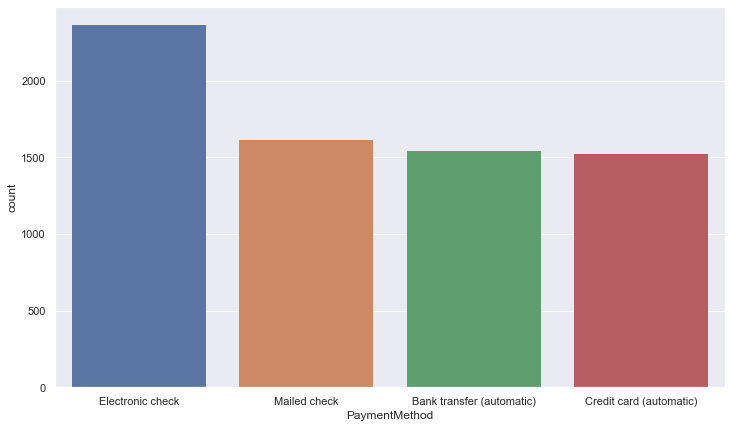

In [14]:
sns.set(rc={'figure.figsize':(12,7)})
sns.countplot(data=data, x='PaymentMethod', linewidth=0)

*Explanation*

Based on the graph above, We know that Electronic Check has the highest value with a total of 2365 customers, the second place is Mailed check with a total of 1612 customers, the third place is Bang Transfer with a total of 1544, and the last is Credit card with a total of 1522 customers. Based on these results, it is clear that many customers use electronic checks.

## Comparison gender between Male and Female

<AxesSubplot:xlabel='gender', ylabel='count'>

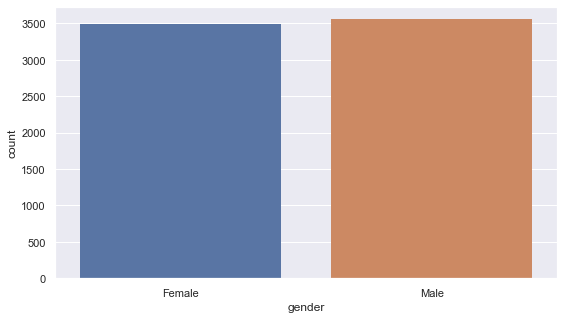

In [15]:
sns.set(rc={'figure.figsize':(9,5)})
sns.countplot(data=data, x='gender', linewidth=0)

*Explanation*

Based on graph above we can see that Customer gender male gender with a total of 3555 customers, while female gender with a total of 3488 customers.

* Male and Female not much different

## Payment Method comparison based on Gender

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

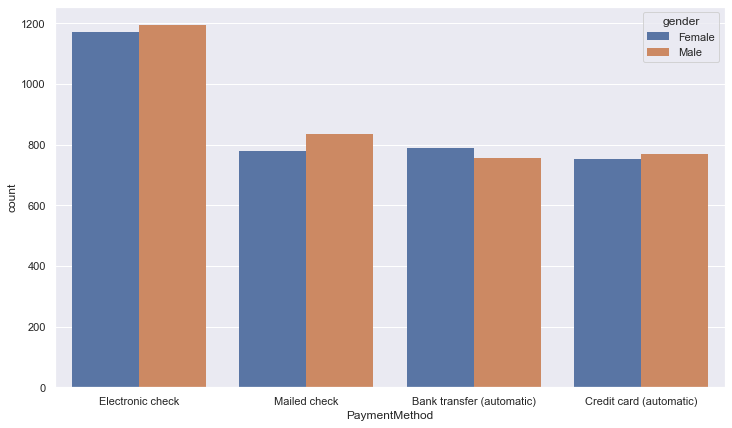

In [16]:
sns.set(rc={'figure.figsize':(12,7)})
sns.countplot(data=data, x='PaymentMethod', hue='gender', linewidth=0)

*Explanation*

Based on the graph above, we can see that the average payment method that outperforms the payment method is male gender, but in contrast to the payment method using Bank Transfer, this method is actually used by female gender with a total of 788 customers and for male a total of 756 customers. Based on these results, we know that Female prefer to use Bank Transfer, while Male is more flexible and likes to use any payment method.

## Tenure comparison based on gender

<AxesSubplot:xlabel='gender', ylabel='tenure'>

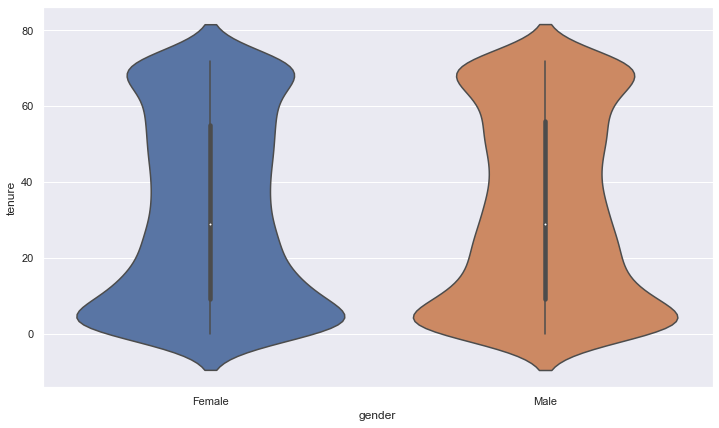

In [17]:
sns.set(rc={'figure.figsize':(12,7)})
sns.violinplot(data=data, x='gender', y='tenure')

*Explanation*

Based on graph above, We know that the tenure distribution between female and male has the same value, which starts from 0 to the highest is at 72. The wide distribution is in the range from 0 to around 10.

In [18]:
data['tenure'].max()

72

## Churn comparison

c:\Users\M A R L E V I\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


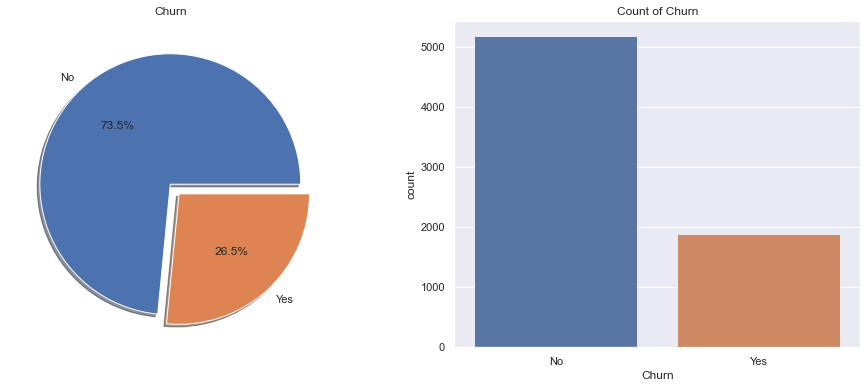

In [19]:
f,ax=plt.subplots(1,2,figsize=(16,6))
sns.set(rc={'figure.figsize':(10,7)})
data['Churn'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[1].set_title('Churn')
ax[0].set_title('Churn')
ax[0].set_ylabel('')
sns.countplot('Churn',data=data,ax=ax[1], linewidth=0)
ax[1].set_title('Count of Churn')
plt.show()

*Explanation*

Based on the graph above, we know that the churn column has an unbalanced value, which is 73.5% for the value No and 26.5% for the value Yes.

## Correlation

<AxesSubplot:>

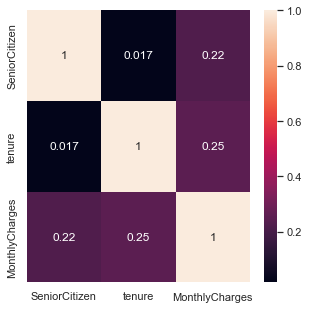

In [20]:
sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(data.corr(), annot=True)

Based on graph, as you can see that the tenure and senior citizen columns have a good correlation with the MonthlyChanges column, while their senior citizens and tenure have a weak correlation.

# **DATA PREPROCESSING**

In this section, we will setup data for model training, such as data sharing into train-dev-test, data transformation (normality, encoding, etc.), and other necessary processes.

considering there is a string column containing numeric, I will make changes to the contents of the column in this section.

In [21]:
# Change object into float

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors = 'coerce')

In [22]:
# Check information dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We have made changes to the column, then we will take a sample for data inference. Before going any further, I will convert the target column to binary 0 and 1.

In [23]:
data['Churn'] = np.where(data['Churn'] == 'No', 0,1)

In [24]:
# Check Value on Churn

data['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

## Data Inference

In [25]:
# Get data inference with data sample

data_inference = data.sample(13, random_state=10)
data_inference

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6418,2486-WYVVE,Male,0,Yes,No,31,Yes,Yes,DSL,No,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,79.30,2484.00,0
1948,8183-ONMXC,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,No,Electronic check,80.75,159.45,1
4497,0575-CUQOV,Male,1,Yes,No,60,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,97.95,5867.00,0
66,8627-ZYGSZ,Male,0,Yes,No,47,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,One year,Yes,Electronic check,78.90,3650.35,0
1705,4918-FYJNT,Female,1,Yes,No,55,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,No,Month-to-month,No,Electronic check,90.45,5044.80,0
924,4824-GUCBY,Female,1,No,No,22,Yes,No,Fiber optic,Yes,Yes,No,No,No,No,Month-to-month,No,Electronic check,81.70,1820.90,0
1051,3845-JHAMY,Female,0,Yes,Yes,16,No,No phone service,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),35.50,552.70,0
7012,6691-CCIHA,Female,0,Yes,No,62,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,Yes,Two year,Yes,Electronic check,84.95,5150.55,0
3723,7010-ZMVBF,Female,0,Yes,Yes,18,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,357.00,0
4590,4884-TVUQF,Female,1,No,No,57,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),101.30,5779.60,0


we have made data inference, next we will make data Train Test set.

## Train Test Set

We will create a Train Test data set where this data is the data that we will use to conduct training and test the model that we will create, this data also cannot be included from the inference data.

In [26]:
data_train_test = data.drop(data_inference.index)
data_train_test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


We will do reset index of the two data

In [27]:
# Reset Index

data_inference.reset_index(drop=True, inplace=True)
data_train_test.reset_index(drop=True, inplace=True)

In [28]:
data_inference

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,2486-WYVVE,Male,0,Yes,No,31,Yes,Yes,DSL,No,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,79.30,2484.00,0
1,8183-ONMXC,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,No,Electronic check,80.75,159.45,1
2,0575-CUQOV,Male,1,Yes,No,60,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,97.95,5867.00,0
3,8627-ZYGSZ,Male,0,Yes,No,47,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,One year,Yes,Electronic check,78.90,3650.35,0
4,4918-FYJNT,Female,1,Yes,No,55,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,No,Month-to-month,No,Electronic check,90.45,5044.80,0
5,4824-GUCBY,Female,1,No,No,22,Yes,No,Fiber optic,Yes,Yes,No,No,No,No,Month-to-month,No,Electronic check,81.70,1820.90,0
6,3845-JHAMY,Female,0,Yes,Yes,16,No,No phone service,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),35.50,552.70,0
7,6691-CCIHA,Female,0,Yes,No,62,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,Yes,Two year,Yes,Electronic check,84.95,5150.55,0
8,7010-ZMVBF,Female,0,Yes,Yes,18,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,357.00,0
9,4884-TVUQF,Female,1,No,No,57,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),101.30,5779.60,0


we have finished resetting index.

## Splitting Dataset

We will do splitting dataset between X and y, which X is Feature and y is Target. 

In [29]:
# Split between X and y 

X = data_train_test.drop('Churn', axis=1)
y = data_train_test['Churn']

In [30]:
# Display Feature

X.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [31]:
# Display Target

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

Doing Train Test and val Split

In [32]:
# Split Train Test and Val

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=10, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=10, stratify=y)

# Display dimensional
print('X_train Shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('\nX_test Shape:', X_test.shape)
print('y_test shape:', y_test.shape)
print('\nX_val Shape:', X_val.shape)
print('y_val shape:', y_val.shape)

X_train Shape: (5624, 20)
y_train shape: (5624,)

X_test Shape: (1406, 20)
y_test shape: (1406,)

X_val Shape: (1406, 20)
y_val shape: (1406,)


We have successfully carried out the Train Test and val split.

## Handling Outliers

### Outliers

An outlier is a data that deviates or is outside of the standard deviation, we must handle outliers because this can affect the model we are going to make. We will only handle outliers in the Train-set section, before that we will detect outliers.

We will detect outliers using a boxplot, therefore we will create a new variable to drop the column type object

In [33]:
# Drop columns object

data_outliers = X_train.drop(columns=X_train.select_dtypes(object), axis=1)

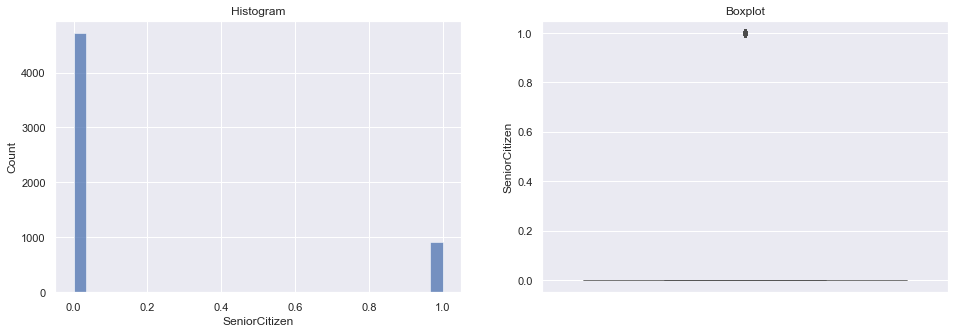

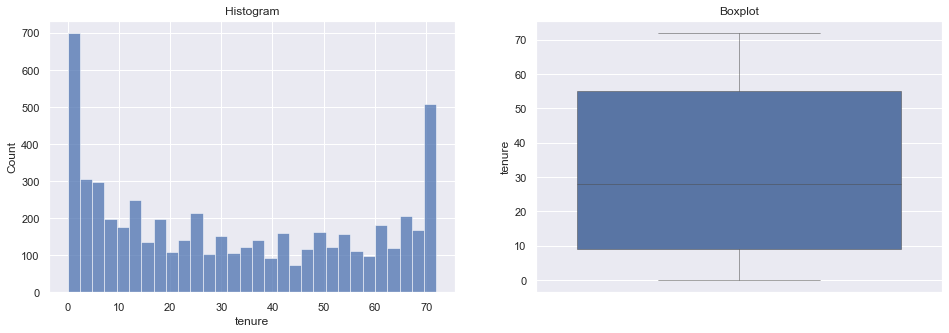

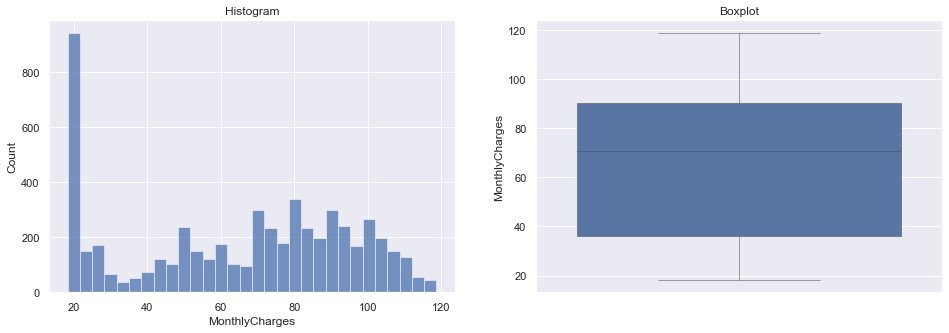

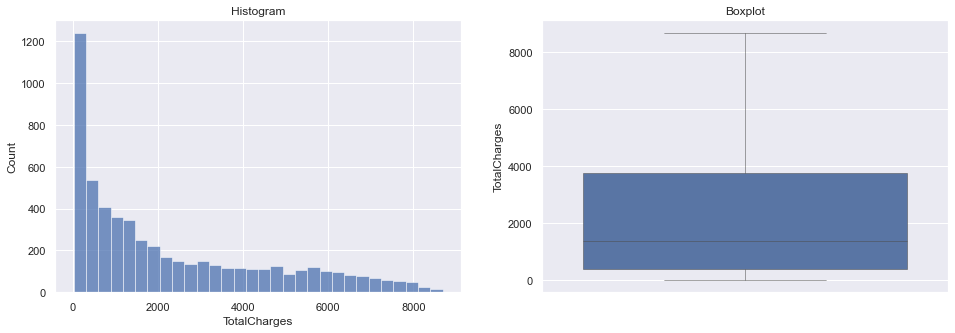

In [34]:
diag_outlier_plots(data_outliers)

Based on graph above, we see that there are outliers in the Senior Citizen column which are at number 1, I dont think this is a strange outlier but indeed this is the content of the column value, because the column containing 0 represents No and 1 represents Yes, so we will not handle outliers.

## Handling Missing Value

We will check for missing values on the Train Test data set.

In [35]:
detect_missval(X_train)

,Columns Name,Missing Count,Missing Percentage
19,TotalCharges,11,0.19559


In [36]:
detect_missval(X_test)

,Columns Name,Missing Count,Missing Percentage


In [37]:
detect_missval(X_val)

,Columns Name,Missing Count,Missing Percentage


In [38]:
y_train.isnull().sum()

0

In [39]:
y_test.isnull().sum()

0

In [40]:
y_val.isnull().sum()

0

We have missing value in X_train, we will see the entire missing value in the Total Charges column

In [41]:
data_missval = X_train[X_train.TotalCharges.isnull()]
data_missval

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5209,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
934,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN
6742,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
487,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
3819,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
1337,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
752,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
1079,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
4373,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
3326,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN


We can see that the missing is classified as Missing Completely at Random (MCAR), which means that the data loss has nothing to do with other features. In this case I will use the Complete Case Analysis (CCA) method, which will remove all data from the column containing the missing value, before doing CCA we will first check the data changes in the Total Charges column.

In [42]:
print('Dimensinonal X_train Before CCA :', X_train.shape[0])
print('Dimensinonal X_train After CCA :', X_train.dropna().shape[0])
print('Percentage that does not contain Missing Value :', X_train.dropna().shape[0] / np.float(X_train.shape[0]) * 100)

Dimensinonal X_train Before CCA : 5624
Dimensinonal X_train After CCA : 5613
Percentage that does not contain Missing Value : 99.80440967283073


C:\Users\MARLEV~1\AppData\Local\Temp/ipykernel_2924/1136761407.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print('Percentage that does not contain Missing Value :', X_train.dropna().shape[0] / np.float(X_train.shape[0]) * 100)


As we can see that the changes that occur are not that big and the percentage of data that does not contain missing values is very high, which means we will do CCA safely.

In [43]:
# Delete rows containing missing value

X_train.dropna(axis=0, how='any', inplace=True)
print('Total X_train :',X_train.shape[0])

Total X_train : 5613


We have successfully handled missing values, because we have dropped X_train now we will drop the y-train

In [44]:
# Check Dimensional 

print('X_train Shape:', X_train.shape)
print('y_train shape:', y_train.shape)

X_train Shape: (5613, 20)
y_train shape: (5624,)


In [45]:
# Drop data misisng 
y_train.drop(data_missval.index, inplace=True)

In [46]:
# Check Dimensional y_train
y_train.shape

(5613,)

We have finished dropping the y_train

## Feature Selection

Here we will determine or final selection in the selection of the column that will be our feature, in determining the column we will usually use a heatmap to see the correlation of each column and can also use personal judgment if we have a certain statement about that column. We will check from data (X_train) and combine it with target data (y_train). There are several things we should pay attention to in looking at the correlation between features and targets.

1. Correlation has a range of values ​​from -1 to 1 where if the value is close to 0 it means that the features are not correlated with each other, as well as a value that is close to 1 means that the features are correlated with each other.

2. Seeing the correlation using a heatmap can only be used for columns that are numerical, not categorical

3. Target and feature may be correlated, to ensure that the feature matches the target that we will make predictions.

4. Features must not be correlated with other features.

### Numerical Selection

Before checking the heatmap, I will concat the X_train and y_train data

In [47]:
heat = pd.concat([X_train, y_train], axis=1)

after concat we will check heatmap

<AxesSubplot:>

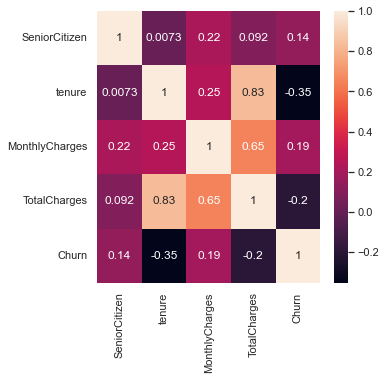

In [48]:
sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(heat.corr(), annot=True)

Based on graph above, there is 1 column that has a correlation of 0.14, namely the SeniorCitizen column, in my opinion, this column is not weak considering that the value of the results is not too high. but there are fellow feature columns that have a high correlation, namely TotalCharges - Monthly Charges and TotalCharges - Tenure. In this case I will drop the TotalCharges column.

### Categorical Selection

In categorical selection, we will use chi square to see the p-value of that column. If the column has a high p-value or exceeds 0.05, we will delete the column.

In [49]:
# Check Chi Square Using Function

check_chisquare(X_train)

========= P-Value =========
customerID : 1.0
gender : 0.43098506048323526
Partner : 0.01688434815542076
Dependents : 1.0043331997219905e-199
PhoneService : 0.0
MultipleLines : 0.0
InternetService : 3.7205642835837675e-97
OnlineSecurity : 3.430628976042459e-157
OnlineBackup : 2.5644284439433993e-95
DeviceProtection : 3.7205642835837675e-97
TechSupport : 2.826516386360377e-154
StreamingTV : 3.656838567764546e-80
StreamingMovies : 3.991841510910891e-80
Contract : 1.0496120462367187e-275
PaperlessBilling : 4.9214924576631103e-45
PaymentMethod : 3.2969406021645687e-56
========= P-Value =========


Based on the columns above, I think the customerID, and gender does not affect the target we want because they have p-value greater than 0.05, so i decide to remove that columns.

In [50]:
# Dropping Columns

X_train.drop(['customerID','gender', 'TotalCharges'], axis=1, inplace=True)
X_test.drop(['customerID','gender', 'TotalCharges'], axis=1, inplace=True)
X_val.drop(['customerID','gender', 'TotalCharges'], axis=1, inplace=True)

# **GENERATE PIPELINE**

## Numerical Columns

In this section we will do scaling, which is only done on numeric type columns and there are several things that must be considered before scaling, namely if the distribution is normal we will use the Standard Scaler method and if it is skewed we will use MinMaxScaler. To find out whether the column is skewed or not, we can see the distribution in the handling outliers section, but this time we will look at the skewness value of the skewness value.

In [51]:
# Cek distribusi

check_dist(X_train)

skew_dist : ['SeniorCitizen']
normal_dist : ['tenure', 'MonthlyCharges']


As you can see we have 1 columns skew distribution and 2 columns normal distribution, in this case we will separate between normal distribution and skewed distribution.

In [52]:
# Numeric Normal

numeric_normal = ['tenure', 'MonthlyCharges']

# Numeric Skewed

numeric_skewed = ['SeniorCitizen']

We have created a pipeline for numerical, then we will make pipeline processing for categorical.

## Categorical Columns

For this section we will encode all categorical columns, why should we use encode? because computers cannot read input in the form of categories, computers can only read numbers, therefore we have to do encoding to change the previously categorical column to numeric so that the computer can understand the data we provide.

Category Type:

1. Nominal = column category that has no levels
2. Ordinal = column category that has levels

In [53]:
# Display X_train

X_train.select_dtypes(include=['object']).head()

,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
3418,No,Yes,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check
6478,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1282,Yes,No,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check
1480,Yes,Yes,Yes,No,DSL,Yes,Yes,No,Yes,No,Yes,One year,Yes,Credit card (automatic)
1302,No,No,Yes,No,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic)


In [54]:
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

## Columns Transformer

In [55]:
# Make the Feature Engineering Pipeline
pipe_preprocessing = ColumnTransformer([
    ('OneHot', OneHotEncoder(handle_unknown='ignore'), cat_columns),
    ('StdScaler', StandardScaler(), numeric_normal),
    ('MMScaler', MinMaxScaler(), numeric_skewed)
]) 

In [56]:
# Combines all categoriez into one

final_features = cat_columns + numeric_normal + numeric_skewed

In [57]:
# Use selected variables

X_train = X_train[final_features]
X_val =  X_val[final_features]
X_test = X_test[final_features]

After generate columns transformer and pipeline, now we will doing preprocessing

In [58]:
# Feature Engineering Process

X_train_final = pipe_preprocessing.fit_transform(X_train)
X_test_final = pipe_preprocessing.transform(X_test)
X_val_final = pipe_preprocessing.transform(X_val)

Check dimensional

In [61]:
print(X_train_final.shape)
print(X_test_final.shape)
print(X_val_final.shape)

(5613, 42)
(1406, 42)
(1406, 42)


## Tensorflow Pipeline

In [62]:
# Save tensorflow pipe using slices

X_train_pipe = tf.data.Dataset.from_tensor_slices((X_train_final, y_train)).shuffle(5000).batch(32)
X_test_pipe = tf.data.Dataset.from_tensor_slices((X_test_final, y_test)).batch(32)
X_val_pipe = tf.data.Dataset.from_tensor_slices((X_val_final, y_val)).batch(32)

# **MODELING**

In this section we will do modeling by doing 2 experiments, some of which use 4 hidden layers and 5 hidden layers, after that we will see the visualization results and determine which hidden layer to use from the two experiments.

Before modeling the hidden layer, I will create a function for callbak.

In [61]:
# Funtion for callback 

class stop_training(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('val_accuracy')>0.82):
            print("\nReached 82% accuracy so canceling training!")
            self.model.stop_training = True

my_callbacks = stop_training()


early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                  patience=5,
                                                  restore_best_weights=True)

## Hidden Layer 4

**Model**

In [62]:
# Sequential API with Hidden Layer 4

model_sequen = Sequential()
model_sequen.add(Dense(32, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(), input_shape=(X_train_final.shape[1], )))
model_sequen.add(Dense(16, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()))
model_sequen.add(Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()))
model_sequen.add(Dense(4, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()))
model_sequen.add(Dense(2, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()))
model_sequen.add(Dense(1, activation='sigmoid'))

# Compile Model
model_sequen.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

We have created a sequential API, using with a total node for input of 32, the first hidden layer 16 nodes, the second hidden layer, 8 nodes, the third hidden layer 4 nodes, the fourth hidden layer 2 nodes, and with the output 1 nodes, with the activation relu and the kernel initializer he_normal.

In [63]:
# Functional API with Hidden Layer 4

data_input = Input(shape=(X_train_final.shape[1],))
hidden_1 = Dense(32, kernel_initializer=tf.keras.initializers.HeNormal(), activation='relu')(data_input)
hidden_2 = Dense(16, kernel_initializer=tf.keras.initializers.HeNormal(), activation='relu')(hidden_1)
hidden_3 = Dense(8, kernel_initializer=tf.keras.initializers.HeNormal(), activation='relu')(hidden_2)
hidden_4 = Dense(4, kernel_initializer=tf.keras.initializers.HeNormal(), activation='relu')(hidden_3)
hidden_5 = Dense(2, kernel_initializer=tf.keras.initializers.HeNormal(), activation='relu')(hidden_4)
concat = concatenate([data_input, hidden_5])
out = Dense(1, activation='sigmoid')(concat)

# Combine
model_functional = Model(inputs=data_input,
              outputs=out)

# Compile Model
model_functional.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

We have created a Functional API, using with a total node for input of 32, the first hidden layer 16 nodes, the second hidden layer, 8 nodes, the third hidden layer 4 nodes, the fourth hidden layer 2 nodes, and with the output 1 nodes, with the activation relu and the kernel initializer he_normal.

**Summary**

In [64]:
# Show summary of model Sequential API

model_sequen.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                1376      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 2)                 10        
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 2,089
Trainable params: 2,089
Non-trainabl

In [65]:
# Show summary of model Functional

model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 42)]         0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 32)           1376        ['input_1[0][0]']                
                                                                                                  
 dense_7 (Dense)                (None, 16)           528         ['dense_6[0][0]']                
                                                                                                  
 dense_8 (Dense)                (None, 8)            136         ['dense_7[0][0]']                
                                                                                              

**TRAIN MODEL**

In this section we will train the model for hidden layer 4, using the 20 epochs and the callbacks we created earlier and here I use verbose = 0 because I don't want to display iterations of the epochs.

In [66]:
# Train Sequential Method

history_seq = model_sequen.fit(X_train_pipe, epochs=20, validation_data=(X_val_pipe),
                             callbacks=[early_stopping, my_callbacks], verbose=0)

In [67]:
 #Train Functional API Method
 
history_fun = model_functional.fit(X_train_pipe, epochs=20, validation_data=(X_val_pipe), 
                            callbacks=[early_stopping, my_callbacks], verbose=0)

## Hidden Layer 5

**MODEL**

In [68]:
# Sequential API with Hidden Layer 5

model_sequen_5 = Sequential()
model_sequen_5.add(Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(), input_shape=(X_train_final.shape[1], )))
model_sequen_5.add(Dense(32, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()))
model_sequen_5.add(Dense(16, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()))
model_sequen_5.add(Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()))
model_sequen_5.add(Dense(4, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()))
model_sequen_5.add(Dense(2, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()))
model_sequen_5.add(Dense(1, activation='sigmoid'))

# Compile Model
model_sequen_5.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

We have created a sequential API, using with a total node for input of 64, the first hidden layer 32 nodes, the second hidden layer, 16 nodes, the third hidden layer 8 nodes, the fourth hidden layer 4 nodes, the fifth hidden layer 2 nodes and with the output 1 nodes, with the activation relu and the kernel initializer he_normal.

In [69]:
# Functional API with Hidden Layer 5

data_input_1 = Input(shape=(X_train_final.shape[1],))
hidden_1 = Dense(64, kernel_initializer=tf.keras.initializers.HeNormal(), activation='relu')(data_input_1)
hidden_2 = Dense(32, kernel_initializer=tf.keras.initializers.HeNormal(), activation='relu')(hidden_1)
hidden_3 = Dense(16, kernel_initializer=tf.keras.initializers.HeNormal(), activation='relu')(hidden_2)
hidden_4 = Dense(8, kernel_initializer=tf.keras.initializers.HeNormal(), activation='relu')(hidden_3)
hidden_5 = Dense(4, kernel_initializer=tf.keras.initializers.HeNormal(), activation='relu')(hidden_4)
hidden_6 = Dense(2, kernel_initializer=tf.keras.initializers.HeNormal(), activation='relu')(hidden_5)
concat = concatenate([data_input_1, hidden_6])
out_1 = Dense(1, activation='sigmoid')(concat)

# Combine
model_functional_5 = Model(inputs=data_input_1,
              outputs=out_1)

# Compile Model
model_functional_5.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

We have created a Functional API, using with a total node for input of 64, the first hidden layer 32 nodes, the second hidden layer, 16 nodes, the third hidden layer 8 nodes, the fourth hidden layer 4 nodes, the fifth hidden layer 2 nodes and with the output 1 nodes, with the activation relu and the kernel initializer he_normal.

**SUMMARY**

In [70]:
# Show summary of model Sequential API

model_sequen_5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                2752      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dense_15 (Dense)            (None, 8)                 136       
                                                                 
 dense_16 (Dense)            (None, 4)                 36        
                                                                 
 dense_17 (Dense)            (None, 2)                 10        
                                                                 
 dense_18 (Dense)            (None, 1)                

In [71]:
model_functional_5.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 42)]         0           []                               
                                                                                                  
 dense_19 (Dense)               (None, 64)           2752        ['input_2[0][0]']                
                                                                                                  
 dense_20 (Dense)               (None, 32)           2080        ['dense_19[0][0]']               
                                                                                                  
 dense_21 (Dense)               (None, 16)           528         ['dense_20[0][0]']               
                                                                                            

**TRAIN MODEL**

In this section we will train the model for hidden layer 5, using the 20 epochs and the callbacks we created earlier and here I use verbose = 0 because I don't want to display iterations of the epochs.

In [72]:
# Train Sequential Method

history_seq_5 = model_sequen_5.fit(X_train_pipe, epochs=20, validation_data=(X_val_pipe),
                             callbacks=[early_stopping, my_callbacks], verbose=0)

In [73]:
 #Train Functional API Method

history_fun_5 = model_functional_5.fit(X_train_pipe, epochs=20, validation_data=(X_val_pipe), 
                            callbacks=[early_stopping, my_callbacks], verbose=0)

### VISUALISASI HIDDEN LAYER 4

In this section we will see the visualization of the results of the hidden layer 4

Plot Loss and Val Loss

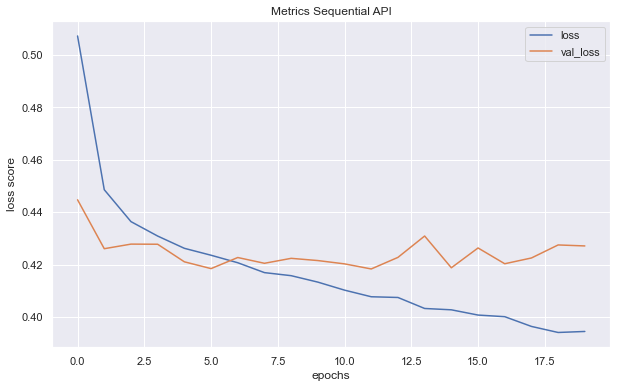

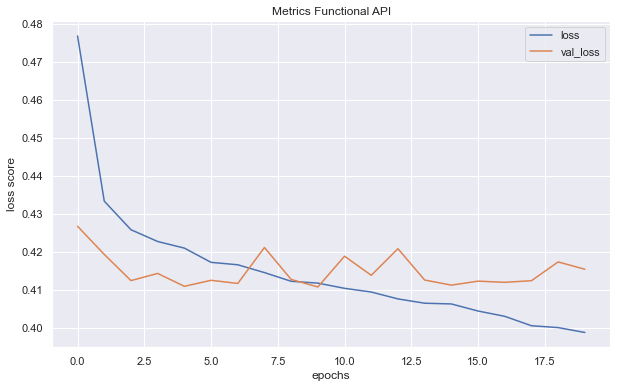

In [74]:
# Evaluation Sequential API Method vs Functional API Method

plot_seq = pd.DataFrame(history_seq.history)
plot_fun = pd.DataFrame(history_fun.history)


# Visualization Sequential
plot_seq[['loss','val_loss']].plot(figsize=(10, 6))
plt.title('Metrics Sequential API')
plt.ylabel('loss score')
plt.xlabel('epochs')
plt.show()

# Visualization Funtional
plot_fun[['loss','val_loss']].plot(figsize=(10, 6))
plt.title('Metrics Functional API')
plt.ylabel('loss score')
plt.xlabel('epochs')
plt.show()

Plot Accuracy and Val Accuracy

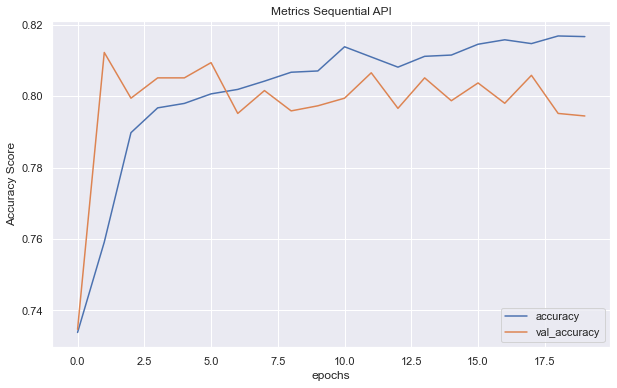

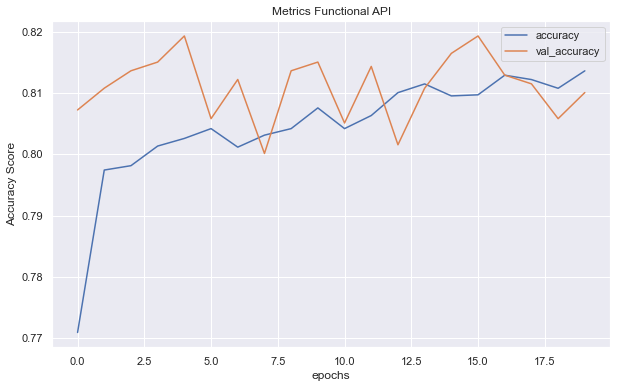

In [75]:
# Visualization Sequential
plot_seq[['accuracy','val_accuracy']].plot(figsize=(10, 6))
plt.title('Metrics Sequential API')
plt.ylabel('Accuracy Score')
plt.xlabel('epochs')
plt.show()

# Visualization Funtional
plot_fun[['accuracy','val_accuracy']].plot(figsize=(10, 6))
plt.title('Metrics Functional API')
plt.ylabel('Accuracy Score')
plt.xlabel('epochs')
plt.show()

Based on graph above :

**Sequential API** : as we can see that in epoch 5, the loss tried to go up but the callback managed to make a decrease against the loss. And we can see that there is a good fit in epoch 15.

**Funtional API** : as we can see that in epoch 7 goodfit occurs, but after passing epoch 7.5 the loss becomes wider which means this is not very good



### VISUALISASI HIDDEN LAYER 5

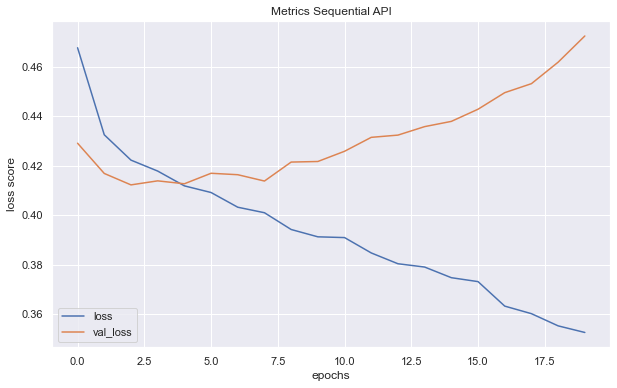

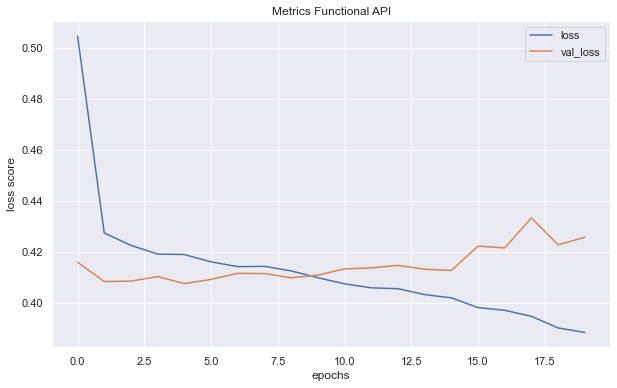

In [76]:
# Evaluation Sequential API Method vs Functional API Method

plot_seq_5 = pd.DataFrame(history_seq_5.history)
plot_fun_5 = pd.DataFrame(history_fun_5.history)


# Visualization Sequential
plot_seq_5[['loss','val_loss']].plot(figsize=(10, 6))
plt.title('Metrics Sequential API')
plt.ylabel('loss score')
plt.xlabel('epochs')
plt.show()

# Visualization Funtional
plot_fun_5[['loss','val_loss']].plot(figsize=(10, 6))
plt.title('Metrics Functional API')
plt.ylabel('loss score')
plt.xlabel('epochs')
plt.show()

Plot Accuracy and Val Accuracy

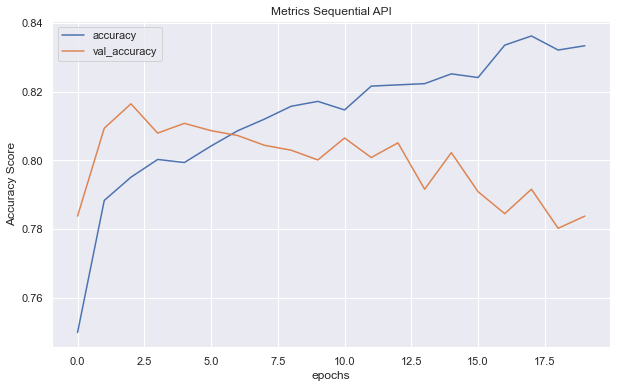

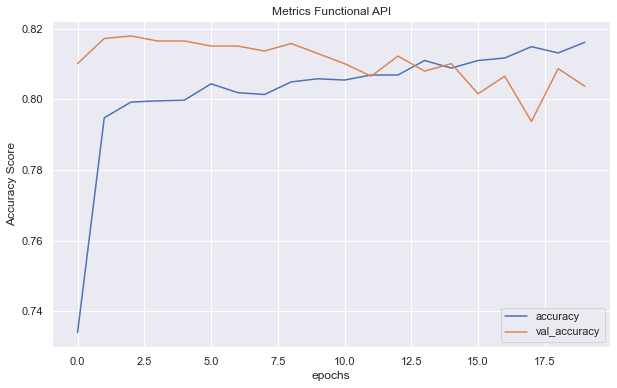

In [77]:
# Visualization Sequential
plot_seq_5[['accuracy','val_accuracy']].plot(figsize=(10, 6))
plt.title('Metrics Sequential API')
plt.ylabel('Accuracy Score')
plt.xlabel('epochs')
plt.show()

# Visualization Funtional
plot_fun_5[['accuracy','val_accuracy']].plot(figsize=(10, 6))
plt.title('Metrics Functional API')
plt.ylabel('Accuracy Score')
plt.xlabel('epochs')
plt.show()

Based on graph

**Sequential API** : As we can see that this model has unstable results, in which the loss and val loss widen as they approach epoch 20. From the Accuracy Sequential as well as loss they are not very stable where when approaching epoch 20 the distance between accuracy and epoch widens.

**Functional API** : This model has a better value than the sequential model where the loss is lower and the distance between the loss and the val score is not too far, in this case the model can be said to be stable. Meanwhile, from Accuracy, this model has an accuracy value of 0.82, while from val accuracy it is 0.80 in this case the model is considered good fit.


### Chose Best from Hidden layer

After visualizing and analyzing, we find that the model with 4 hidden layers is the best model with the following results:

* Loss Sequential which is stable and does not widen, and has a goodfit value at epoch 15.
* Accuracy Sequential which is somewhat less stable, but similar to sequential loss, in epoch 5 the callback managed to increase accuracy
* Functional loss which is not very stable, but the results are better than the results from hidden layer 5.

# **MODEL IMPROVEMENT**

In this section, we will perform an improvement model based on the results of the hidden layer 4, Sequential and Functional models.

## Activation Function

### Tanh

In [78]:
# Sequential API with Hidden Layer 4

model_sequen_tanh = Sequential()
model_sequen_tanh.add(Dense(32, activation='tanh', kernel_initializer=tf.keras.initializers.GlorotNormal(), input_shape=(X_train_final.shape[1], )))
model_sequen_tanh.add(Dense(16, activation='tanh', kernel_initializer=tf.keras.initializers.GlorotNormal()))
model_sequen_tanh.add(Dense(8, activation='tanh', kernel_initializer=tf.keras.initializers.GlorotNormal()))
model_sequen_tanh.add(Dense(4, activation='tanh', kernel_initializer=tf.keras.initializers.GlorotNormal()))
model_sequen_tanh.add(Dense(2, activation='tanh', kernel_initializer=tf.keras.initializers.GlorotNormal()))
model_sequen_tanh.add(Dense(1, activation='sigmoid'))

# Compile Model
model_sequen_tanh.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [79]:
# Train Sequential Method
history_seq_tanh = model_sequen_tanh.fit(X_train_pipe, epochs=20, validation_data=(X_val_pipe),
                             callbacks=[early_stopping, my_callbacks], verbose=0)

In [80]:
# Functional API with Hidden Layer 4

data_input_tanh = Input(shape=(X_train_final.shape[1],))
hidden_1 = Dense(32, kernel_initializer=tf.keras.initializers.GlorotNormal(), activation='tanh')(data_input_tanh)
hidden_2 = Dense(16, kernel_initializer=tf.keras.initializers.GlorotNormal(), activation='tanh')(hidden_1)
hidden_3 = Dense(8, kernel_initializer=tf.keras.initializers.GlorotNormal(), activation='tanh')(hidden_2)
hidden_4 = Dense(4, kernel_initializer=tf.keras.initializers.GlorotNormal(), activation='tanh')(hidden_3)
hidden_5 = Dense(2, kernel_initializer=tf.keras.initializers.GlorotNormal(), activation='tanh')(hidden_4)
concat = concatenate([data_input_tanh, hidden_5])
out = Dense(1, activation='sigmoid')(concat)

# Combine
model_functional_tanh = Model(inputs=data_input_tanh,
              outputs=out)

# Compile Model
model_functional_tanh.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [81]:
# Train Sequential Method
history_fun_tanh = model_functional_tanh.fit(X_train_pipe, epochs=20, validation_data=(X_val_pipe),
                             callbacks=[early_stopping, my_callbacks], verbose=0)

### Leaky Relu

In [82]:
# Sequential API with Hidden Layer 4

model_sequen_leaky = Sequential()
model_sequen_leaky.add(Dense(32, activation='LeakyReLU', kernel_initializer=tf.keras.initializers.HeNormal(), input_shape=(X_train_final.shape[1], )))
model_sequen_leaky.add(Dense(16, activation='LeakyReLU', kernel_initializer=tf.keras.initializers.HeNormal()))
model_sequen_leaky.add(Dense(8, activation='LeakyReLU', kernel_initializer=tf.keras.initializers.HeNormal()))
model_sequen_leaky.add(Dense(4, activation='LeakyReLU', kernel_initializer=tf.keras.initializers.HeNormal()))
model_sequen_leaky.add(Dense(2, activation='LeakyReLU', kernel_initializer=tf.keras.initializers.HeNormal()))
model_sequen_leaky.add(Dense(1, activation='sigmoid'))

# Compile Model
model_sequen_leaky.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [83]:
# Train Sequential Method
history_seq_leaky = model_sequen_leaky.fit(X_train_pipe, epochs=20, validation_data=(X_val_pipe),
                             callbacks=[early_stopping, my_callbacks], verbose=0)


Reached 82% accuracy so canceling training!


In [84]:
# Functional API with Hidden Layer 4

data_input_leaky = Input(shape=(X_train_final.shape[1],))
hidden_1 = Dense(32, kernel_initializer=tf.keras.initializers.HeNormal(), activation='LeakyReLU')(data_input_leaky)
hidden_2 = Dense(16, kernel_initializer=tf.keras.initializers.HeNormal(), activation='LeakyReLU')(hidden_1)
hidden_3 = Dense(8, kernel_initializer=tf.keras.initializers.HeNormal(), activation='LeakyReLU')(hidden_2)
hidden_4 = Dense(4, kernel_initializer=tf.keras.initializers.HeNormal(), activation='LeakyReLU')(hidden_3)
hidden_5 = Dense(2, kernel_initializer=tf.keras.initializers.HeNormal(), activation='LeakyReLU')(hidden_4)
concat = concatenate([data_input_leaky, hidden_5])
out = Dense(1, activation='sigmoid')(concat)

# Combine
model_functional_leaky = Model(inputs=data_input_leaky,
              outputs=out)

# Compile Model
model_functional_leaky.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [85]:
# Train Sequential Method
history_fun_leaky = model_functional_leaky.fit(X_train_pipe, epochs=20, validation_data=(X_val_pipe),
                             callbacks=[early_stopping, my_callbacks], verbose=0)

**Analysis**

Activation Function tanh

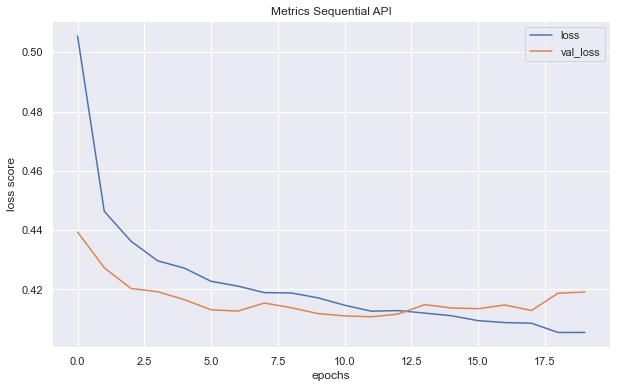

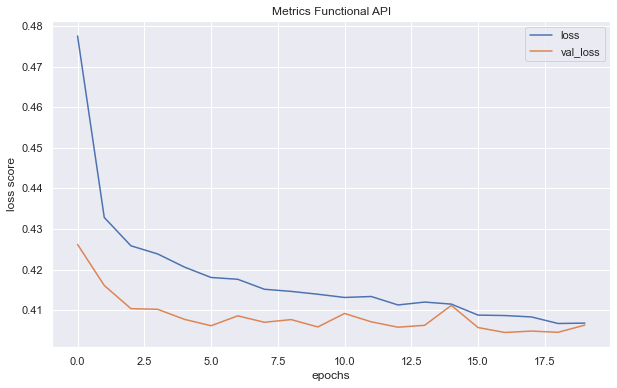

In [86]:
# Evaluation Sequential API Method vs Functional API Method

plot_seq = pd.DataFrame(history_seq_tanh.history)
plot_fun = pd.DataFrame(history_fun_tanh.history)


# Visualization Sequential
plot_seq[['loss','val_loss']].plot(figsize=(10, 6))
plt.title('Metrics Sequential API')
plt.ylabel('loss score')
plt.xlabel('epochs')
plt.show()

# Visualization Funtional
plot_fun[['loss','val_loss']].plot(figsize=(10, 6))
plt.title('Metrics Functional API')
plt.ylabel('loss score')
plt.xlabel('epochs')
plt.show()

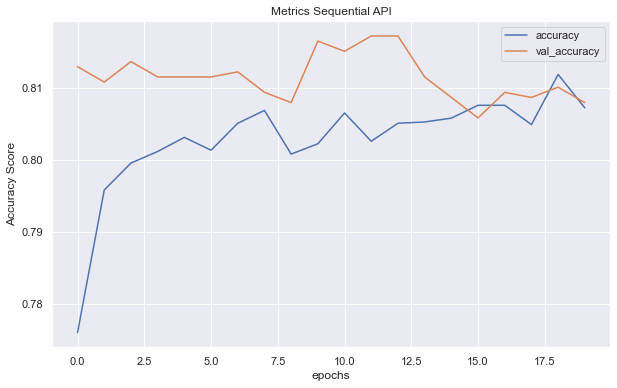

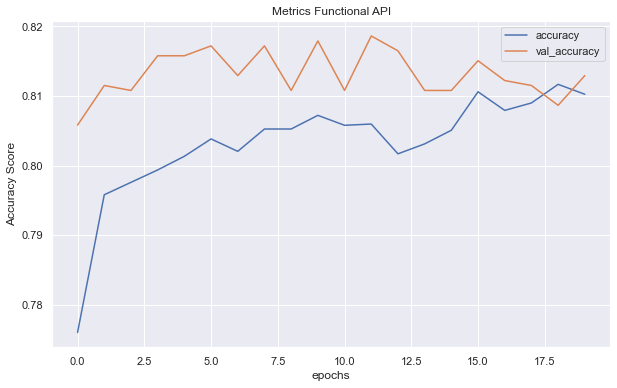

In [87]:
# Visualization Sequential
plot_seq[['accuracy','val_accuracy']].plot(figsize=(10, 6))
plt.title('Metrics Sequential API')
plt.ylabel('Accuracy Score')
plt.xlabel('epochs')
plt.show()

# Visualization Funtional
plot_fun[['accuracy','val_accuracy']].plot(figsize=(10, 6))
plt.title('Metrics Functional API')
plt.ylabel('Accuracy Score')
plt.xlabel('epochs')
plt.show()

Based on graph :

**Sequential API** : we can see that the model with this tanh activation function is worse than the base model, it can be seen in the graph above that the Vanishing gradient occurs in the Sequential API model, this could be caused by the kernel and the activation function that doesn't match the model.

**Functional API** : we can see that this model is good enough using tanh activation as seen from the loss value which is quite low and stable with a val loss value. The value of Accuracy and Val Accuracy are quite good with results that are above 0.80.

Activation Function LeakyReLU

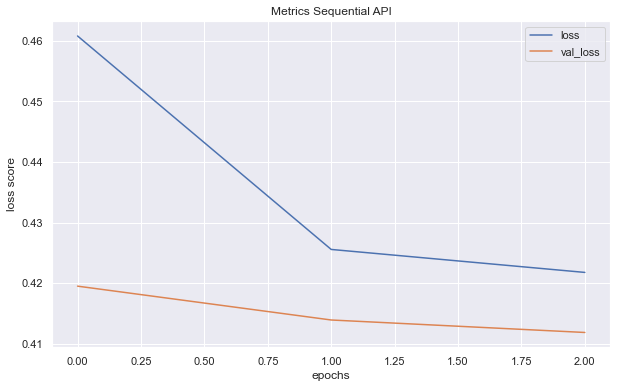

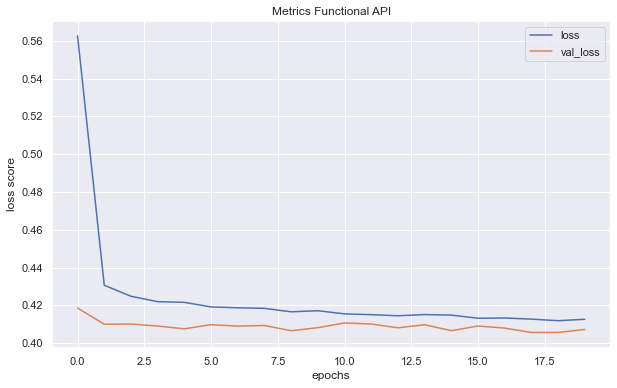

In [88]:
# Evaluation Sequential API Method vs Functional API Method

plot_seq = pd.DataFrame(history_seq_leaky.history)
plot_fun = pd.DataFrame(history_fun_leaky.history)


# Visualization Sequential
plot_seq[['loss','val_loss']].plot(figsize=(10, 6))
plt.title('Metrics Sequential API')
plt.ylabel('loss score')
plt.xlabel('epochs')
plt.show()

# Visualization Funtional
plot_fun[['loss','val_loss']].plot(figsize=(10, 6))
plt.title('Metrics Functional API')
plt.ylabel('loss score')
plt.xlabel('epochs')
plt.show()

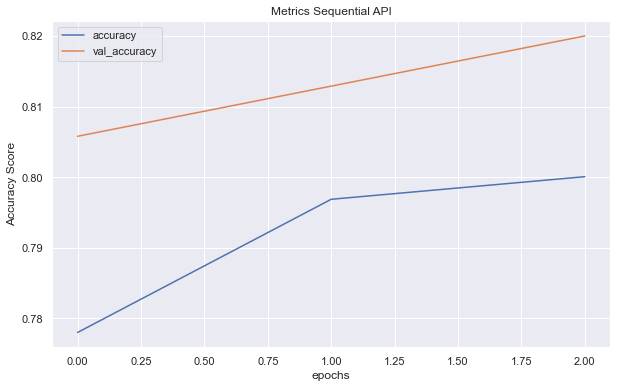

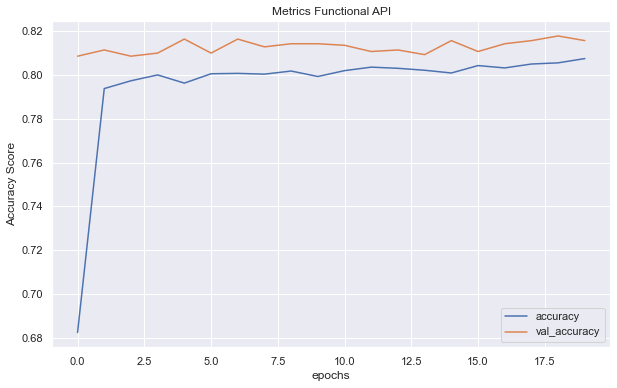

In [89]:
# Visualization Sequential
plot_seq[['accuracy','val_accuracy']].plot(figsize=(10, 6))
plt.title('Metrics Sequential API')
plt.ylabel('Accuracy Score')
plt.xlabel('epochs')
plt.show()

# Visualization Funtional
plot_fun[['accuracy','val_accuracy']].plot(figsize=(10, 6))
plt.title('Metrics Functional API')
plt.ylabel('Accuracy Score')
plt.xlabel('epochs')
plt.show()

Based on graph above :

**Sequential API** : We can see that the loss value with the Leaky relu activation function is better than the loss value from tanh, we can see that the gain obtained is at 0.44 and the val loss is at 0.42, in this case the model with the leaky relu activation function is fairly good. We can also see that the accuracy value obtained reaches 0.82 and the val accuracy is at 0.80, the difference is not too far, this can be said to be goodfit.

**Functional API** : We can see that the results of the Functional API with lower loss and val loss values are around 0.39 to 0.40 this is quite good if we compare the loss values of sequential. The Accuracy value shows that it is below 0.82, in my opinion this result can be said to be quite good if considering the distance between accuracy and val accuracy is not much different.


### Choose between tanh or LeakyReLU

In this case, I will choose the functional API model with the leaky relu activation function, because in my opinion the model has a pretty good value, although it has a higher loss and val loss value, the leaky relu model also has sufficient accuracy and val accuracy good values.

Classification Report Functional API Leaky Relu

In [90]:
# Classification Report of Functional API

print('Classification Report - Functional API LeakyRelU')
print()

y_train_pred_fun = model_functional_leaky.predict(X_train_pipe)
y_train_pred_fun = np.where(y_train_pred_fun > 0.5, 1, 0)
print(classification_report(y_train, y_train_pred_fun))
print()
y_test_pred_fun = model_functional_leaky.predict(X_test_pipe)
y_test_pred_fun = np.where(y_test_pred_fun > 0.5, 1, 0)
print(classification_report(y_test, y_test_pred_fun))

Classification Report - Functional API LeakyRelU

176/176 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.73      0.79      0.76      4119
           1       0.27      0.21      0.24      1494

    accuracy                           0.64      5613
   macro avg       0.50      0.50      0.50      5613
weighted avg       0.61      0.64      0.62      5613


44/44 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1033
           1       0.70      0.53      0.60       373

    accuracy                           0.82      1406
   macro avg       0.77      0.72      0.74      1406
weighted avg       0.81      0.82      0.81      1406



We can see that the results of the classification report above show that there is an underfit of the Functional leakyRelu model where the precision value of the test is higher than the train.

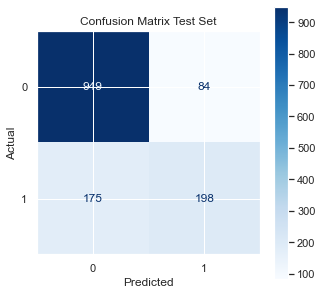

In [91]:
# Confusion Matrix of Functional API test set 
cm = confusion_matrix(y_test,y_test_pred_fun)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap = 'Blues')
plt.title('Confusion Matrix Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Based on the confusion matrix above, we can see that the actual value of 1 which is predicted as 0 is 175 and the value of i 1 which is predicted as 1 is 198, this can be said to be less good, because we want to minimize predict errors.

## Improvement Model LeakyReLU

In [92]:
# Functional API with Hidden Layer 4

data_input_imp = Input(shape=(X_train_final.shape[1],))
hidden_1 = Dense(32, kernel_initializer=tf.keras.initializers.LecunNormal(), activation='LeakyReLU')(data_input_imp)
hidden_2 = Dense(16, kernel_initializer=tf.keras.initializers.LecunNormal(), activation='LeakyReLU')(hidden_1)
hidden_3 = Dense(8, kernel_initializer=tf.keras.initializers.LecunNormal(), activation='LeakyReLU')(hidden_2)
hidden_4 = Dense(4, kernel_initializer=tf.keras.initializers.LecunNormal(), activation='LeakyReLU')(hidden_3)
hidden_5 = Dense(2, kernel_initializer=tf.keras.initializers.LecunNormal(), activation='LeakyReLU')(hidden_4)
concat = concatenate([data_input_imp, hidden_5])
out = Dense(1, activation='sigmoid')(concat)

# Combine
model_functional_imp = Model(inputs=data_input_imp,
              outputs=out)

# Compile Model
model_functional_imp.compile(loss='binary_crossentropy',
              optimizer= tf.keras.optimizers.Nadam(clipvalue=1.0),
              metrics=['accuracy'])

In [93]:
# Train Functional Method Improvement
history_fun_im = model_functional_imp.fit(X_train_pipe, epochs=20, 
                                    validation_data=(X_val_pipe), callbacks=[early_stopping, my_callbacks]
                                    ,verbose=0)


Reached 82% accuracy so canceling training!


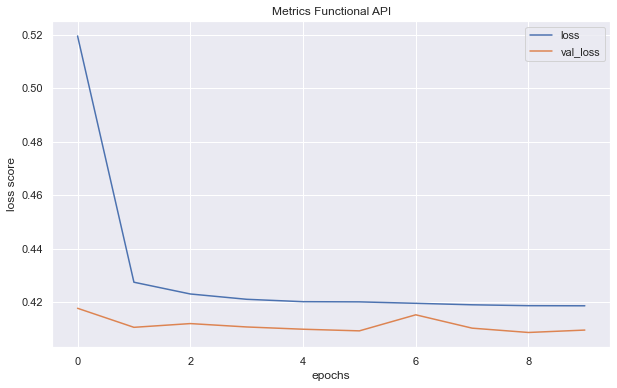

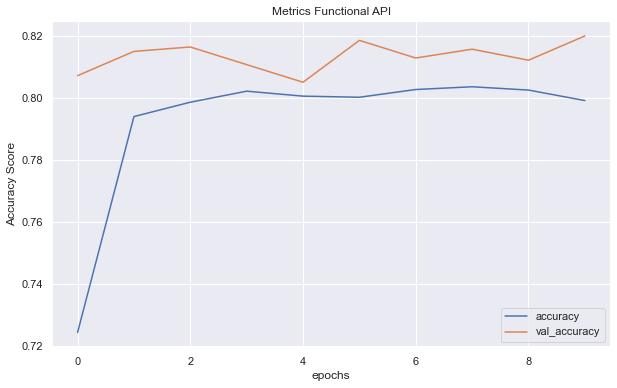

In [112]:
# Evaluation Sequential API Method vs Functional API Method
plot_fun_imp = pd.DataFrame(history_fun_im.history)


# Visualization Loss Score Funtional Improvement
plot_fun_imp[['loss','val_loss']].plot(figsize=(10, 6))
plt.title('Metrics Functional API')
plt.ylabel('loss score')
plt.xlabel('epochs')
plt.show()

# Visualization Accuracy Score Funtional Improvement
plot_fun_imp[['accuracy','val_accuracy']].plot(figsize=(10, 6))
plt.title('Metrics Functional API')
plt.ylabel('Accuracy Score')
plt.xlabel('epochs')
plt.show()

In [95]:
# Classification Report of Sequential API Improved


print('Classification Report - Sequential API Improved')
print()

y_train_pred_fun2 = model_functional_imp.predict(X_train_pipe)
y_train_pred_fun2 = np.where(y_train_pred_fun2 > 0.5, 1, 0)
print(classification_report(y_train, y_train_pred_fun2))
print()
y_test_pred_fun2 = model_functional_imp.predict(X_test_pipe)
y_test_pred_fun2 = np.where(y_test_pred_fun2 > 0.5, 1, 0)
print(classification_report(y_test, y_test_pred_fun2))

Classification Report - Sequential API Improved

176/176 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.73      0.79      0.76      4119
           1       0.26      0.21      0.23      1494

    accuracy                           0.63      5613
   macro avg       0.50      0.50      0.50      5613
weighted avg       0.61      0.63      0.62      5613


44/44 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1033
           1       0.71      0.54      0.61       373

    accuracy                           0.82      1406
   macro avg       0.78      0.73      0.75      1406
weighted avg       0.81      0.82      0.81      1406



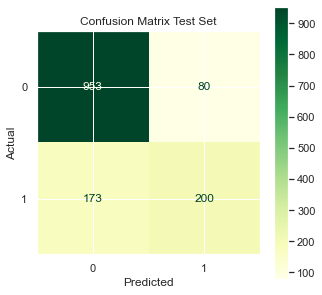

In [113]:
# Confusion Matrix of Sequential API Improved test set 
cm = confusion_matrix(y_test, y_test_pred_fun2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap = 'YlGn')
plt.title('Confusion Matrix Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Based On result :

**Graph** : We can see that the results show that the loss on the Functional API after the improvement is less good than before the improvement, we can see that the loss obtained is at 0.42 and the val loss is at 0.41, the distance is quite close but, if we compare it with before improvements are made, this model is not good. The accuracy of the model after improvement also got poor results due to the instability of the distance between loss and val loss, the loss value was at 0.82 while the val loss was at 0.80

**Classification Report** : the results of the classification report from the improvement model are not much different from before the improvement, where the model remains in an underfit condition.

**Confusion Matrix** : We can see in this case the actual value of 1 predicted 0 decreased to 173 while the actual value 1 predicted to be 1 increased to 200, in the results of this confusion matrix we can see that the improved model has increased.


### Conclusion

After making several improvements to the Functional API model, and getting results that are not too much different from the results before the improvement was carried out, I decided to choose the results of the model that had been improved, because the results from the precision value were fairly good, there was an increase in predicting

# **MODEL SAVING**

In this section, we will save the model that we will use for deployment.

In [116]:
# Save the best model
model_functional_imp.save('model.h5')

In [117]:
# Save PreProcessing Pipeline

with open('pipe_Pre.pkl', 'wb') as file_1:
    pickle.dump(pipe_preprocessing, file_1)

# **MODEL INFERENCE**

Load Model

In [118]:
# Load saved model
model_fun = tf.keras.models.load_model('model.h5')

We will display the data inference

In [119]:
# Display data inference

data_inference

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,2486-WYVVE,Male,0,Yes,No,31,Yes,Yes,DSL,No,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,79.30,2484.00,0
1,8183-ONMXC,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,No,Electronic check,80.75,159.45,1
2,0575-CUQOV,Male,1,Yes,No,60,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,97.95,5867.00,0
3,8627-ZYGSZ,Male,0,Yes,No,47,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,One year,Yes,Electronic check,78.90,3650.35,0
4,4918-FYJNT,Female,1,Yes,No,55,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,No,Month-to-month,No,Electronic check,90.45,5044.80,0
5,4824-GUCBY,Female,1,No,No,22,Yes,No,Fiber optic,Yes,Yes,No,No,No,No,Month-to-month,No,Electronic check,81.70,1820.90,0
6,3845-JHAMY,Female,0,Yes,Yes,16,No,No phone service,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),35.50,552.70,0
7,6691-CCIHA,Female,0,Yes,No,62,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,Yes,Two year,Yes,Electronic check,84.95,5150.55,0
8,7010-ZMVBF,Female,0,Yes,Yes,18,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,357.00,0
9,4884-TVUQF,Female,1,No,No,57,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),101.30,5779.60,0


Check missing value in data inference

In [120]:
data_inference.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no missing value in data inference, next we will drop columns based on X_train drop

In [121]:
# Splitting Dataset

# X will be consist of input parameter only
data_inf = data_inference.drop(['customerID','gender', 'TotalCharges', 'Churn'], axis=1)

# use same variables in final features
# data_inf = data_inf[final_features]
data_inf

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,Yes,No,31,Yes,Yes,DSL,No,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,79.30
1,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,No,Electronic check,80.75
2,1,Yes,No,60,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,97.95
3,0,Yes,No,47,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,One year,Yes,Electronic check,78.90
4,1,Yes,No,55,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,No,Month-to-month,No,Electronic check,90.45
5,1,No,No,22,Yes,No,Fiber optic,Yes,Yes,No,No,No,No,Month-to-month,No,Electronic check,81.70
6,0,Yes,Yes,16,No,No phone service,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),35.50
7,0,Yes,No,62,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,Yes,Two year,Yes,Electronic check,84.95
8,0,Yes,Yes,18,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45
9,1,No,No,57,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),101.30


After dropping the column, then we will do the preprocessing of the data inference using the pipeline that has been created

In [122]:
# Preprocessing data inference

y_inf_pred = pipe_preprocessing.transform(data_inf)

after that we will doing prediction 

In [127]:
# Prediction using best model

prediction_1 = model_fun(y_inf_pred)

After predict we will make threshold for determines the result, in this case i will using 0.5 for threshold. If result is greater than 0.5 then it will be number 1 and if result is less than 0.5 it will be number 0

In [124]:
y_pred_1 = np.where(prediction_1 > 0.5, 1, 0)

y_pred_1

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

After making threshold, we will make dataframe for the result

In [125]:
df_ypred = pd.DataFrame(y_pred_1, columns=['Prediction'])

I will combine the data inference column with the prediction result dataframe

In [126]:
df_prediction = pd.concat([data_inference, df_ypred], axis=1)
df_prediction

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Prediction
0,2486-WYVVE,Male,0,Yes,No,31,Yes,Yes,DSL,No,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,79.30,2484.00,0,0
1,8183-ONMXC,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,No,Electronic check,80.75,159.45,1,1
2,0575-CUQOV,Male,1,Yes,No,60,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,97.95,5867.00,0,0
3,8627-ZYGSZ,Male,0,Yes,No,47,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,One year,Yes,Electronic check,78.90,3650.35,0,0
4,4918-FYJNT,Female,1,Yes,No,55,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,No,Month-to-month,No,Electronic check,90.45,5044.80,0,0
5,4824-GUCBY,Female,1,No,No,22,Yes,No,Fiber optic,Yes,Yes,No,No,No,No,Month-to-month,No,Electronic check,81.70,1820.90,0,0
6,3845-JHAMY,Female,0,Yes,Yes,16,No,No phone service,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),35.50,552.70,0,0
7,6691-CCIHA,Female,0,Yes,No,62,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,Yes,Two year,Yes,Electronic check,84.95,5150.55,0,0
8,7010-ZMVBF,Female,0,Yes,Yes,18,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,357.00,0,0
9,4884-TVUQF,Female,1,No,No,57,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),101.30,5779.60,0,0


We have succeeded in making predictions using the best model, and we can see the results in the datafarme above

**Evaluation Error Data inference**

In [128]:
print(classification_report(data_inference['Churn'], y_pred_1))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.50      0.67         2

    accuracy                           0.92        13
   macro avg       0.96      0.75      0.81        13
weighted avg       0.93      0.92      0.91        13



In this data inference, the results from the Classification report are quite good

# **OVERALL ANALYSIS**

In this modeling, I did some comparisons between the Sequential API and the Functional API by making comparisons such as the number of hidden layers, activation functions and optimizer and the results are:
* The model with hidden layer 4 is better than the model with hidden layer 5.
* In this case Activation LeakyRelU is better than tanh.
* A good optimizer in this case is Nadam.


Evaluation Error :

As we saw earlier that using a metrics classification report is a very good way, because we can see all the results of recall, precision , f1-score and accuracy. Through the classification report, we can find out how much error we have in this model, and I think this model is underfit with a higher test value than the train value. Through the Confusion Matrix, we can find out that our model made a mistake in guessing the actual number 173, in this case it is quite good.

#### Conclusion
Evaluation & Improve Model :

Based on the insights we get from EDA, there are several features that are very influential in modeling, and our dataset is also very good data to use in classification cases. Our dataset also provides good insight for making decisions, as we know in the outliers column there are several decisions that must be made and one of them is based on EDA, besides that our dataset can also provide good features so that we get a fairly good precision value. .

Even though it has gotten a pretty good score and got fairly accurate results, this model has things that need to be improved for the future, namely:

1. Adding Data, because we have very little data and this can make the Train set weak.
2. Adding a feature, related to number 1, adding a feature is also necessary for the model so that the model can learn well and accurately.
3. Perform more hyperparameters.

References :

https://www.kaggle.com/code/mishraay/customer-churn-and-imbalanced-using-keras-ann

https://www.kaggle.com/code/sardiirfansyah/tensorflow-input-pipeline-tf-data